In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)
seed = 42 

In [3]:
# Load the raw data
df = pd.read_csv("Datasets\WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv\WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv")

In [6]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [7]:
df['Revenue'] = (df['Monthly Premium Auto'] * df['Months Since Policy Inception'])

In [18]:
df_sort = df.sort_values(by=["Customer Lifetime Value"], ascending=False)

In [16]:
df['Avg Lifespan A'] = (df['Customer Lifetime Value'] / df['Monthly Premium Auto'])
df['Avg Lifespan B'] = ((df['Customer Lifetime Value'] / df['Monthly Premium Auto']) / df['Number of Policies'])

In [20]:
df_sort.head(3)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Revenue,Avg Lifespan A,Avg Lifespan B
5716,FQ61281,Oregon,83325.38119,No,Extended,High School or Below,1/31/11,Employed,M,58958,Suburban,Married,231,31,74,0,2,Personal Auto,Personal L3,Offer1,Call Center,1108.8,Luxury Car,Small,17094,360.715936,180.357968
1974,YC54142,Washington,74228.51604,No,Extended,High School or Below,1/26/11,Unemployed,M,0,Suburban,Single,242,1,34,0,2,Personal Auto,Personal L1,Offer1,Branch,1742.4,Luxury Car,Medsize,8228,306.729405,153.364703
6252,BP23267,California,73225.95652,No,Extended,Bachelor,2/9/11,Employed,F,39547,Suburban,Married,202,11,21,0,2,Personal Auto,Personal L3,Offer1,Branch,969.6,Luxury SUV,Medsize,4242,362.504735,181.252368


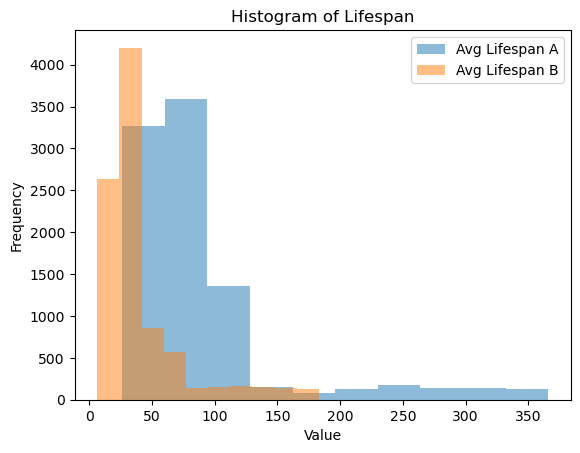

In [21]:
plt.hist(df['Avg Lifespan A'], alpha=0.5, label='Avg Lifespan A')
plt.hist(df['Avg Lifespan B'], alpha=0.5, label='Avg Lifespan B')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Lifespan')
plt.legend(loc='upper right')
plt.show()

In [23]:
print("Lifespan A: ", df['Avg Lifespan A'].var(ddof=0))
print("Lifespan B: ", df['Avg Lifespan B'].var(ddof=0))

Lifespan A:  4170.947822107934
Lifespan B:  1122.9733622396077


In [26]:
df_nums = df.select_dtypes(include=["float", "int"])

cols = df_nums.columns

scaler = MinMaxScaler()

df_mm = pd.DataFrame(scaler.fit_transform(df_nums), columns=cols)

In [27]:
print("Lifespan A: ", df_mm['Avg Lifespan A'].var(ddof=0))
print("Lifespan B: ", df_mm['Avg Lifespan B'].var(ddof=0))

Lifespan A:  0.036144738533410936
Lifespan B:  0.036059523243006625


In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer Lifetime Value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
Income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
Monthly Premium Auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
Months Since Last Claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
Months Since Policy Inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
Number of Open Complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
Number of Policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
Total Claim Amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678
Revenue,9134.0,4499.995402,3267.593567,0.000000,2054.250000,4080.000000,6153.000000,28012.000000
Avg Lifespan A,9134.0,86.234249,64.586411,26.115753,39.833697,76.501502,93.881456,365.815196


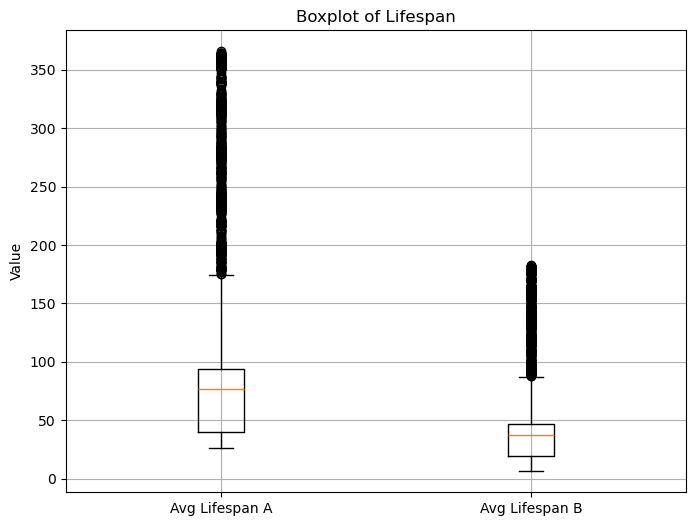

In [30]:
plt.figure(figsize=(8, 6))
plt.boxplot([df['Avg Lifespan A'], df['Avg Lifespan B']], labels=['Avg Lifespan A', 'Avg Lifespan B'])
plt.title('Boxplot of Lifespan')
plt.ylabel('Value')
plt.grid(True)
plt.show()

In [31]:
# Function to calculate the Quartile Coefficient of Dispersion
def quartile_coefficient_of_dispersion(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    return (Q3 - Q1) / (Q3 + Q1)

# Calculating QCD for 'feature1'
qcd_feature1 = quartile_coefficient_of_dispersion(df['Avg Lifespan A'])
print("Quartile Coefficient of Dispersion for Avg Lifespan A:", qcd_feature1)

# Calculating QCD for 'feature2'
qcd_feature2 = quartile_coefficient_of_dispersion(df['Avg Lifespan B'])
print("Quartile Coefficient of Dispersion for Avg Lifespan B:", qcd_feature2)

Quartile Coefficient of Dispersion for Avg Lifespan A: 0.4042007022479199
Quartile Coefficient of Dispersion for Avg Lifespan B: 0.40540034179035683


In [32]:
df_sort = df.sort_values(by=["Customer Lifetime Value"], ascending=True)

In [40]:
df_sort.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Revenue,Avg Lifespan A,Avg Lifespan B
6037,UM17151,California,1898.007675,No,Basic,Bachelor,2/26/11,Unemployed,M,0,Suburban,Single,67,15,91,3,1,Personal Auto,Personal L2,Offer1,Agent,413.606733,Two-Door Car,Medsize,6097,28.328473,28.328473
2210,CI68869,Arizona,1898.683686,No,Basic,College,1/8/11,Unemployed,F,0,Suburban,Single,70,17,20,5,1,Personal Auto,Personal L3,Offer3,Agent,702.020904,Two-Door Car,Small,1400,27.124053,27.124053
2771,XT54610,California,1904.000852,No,Basic,Bachelor,1/14/11,Unemployed,F,0,Suburban,Single,63,22,7,3,1,Personal Auto,Personal L1,Offer1,Agent,302.400000,Four-Door Car,Medsize,441,30.222236,30.222236
7083,EH70612,California,1918.119700,No,Basic,College,2/15/11,Unemployed,M,0,Suburban,Single,61,2,54,2,1,Personal Auto,Personal L1,Offer1,Branch,439.200000,Two-Door Car,Small,3294,31.444585,31.444585
6711,XI84293,Oregon,1940.981221,No,Basic,High School or Below,2/7/11,Unemployed,M,0,Suburban,Single,66,5,40,3,1,Personal Auto,Personal L3,Offer3,Call Center,475.200000,Two-Door Car,Large,2640,29.408806,29.408806


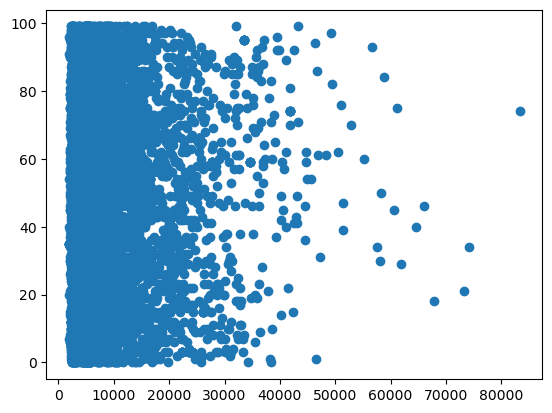

In [34]:
plt.scatter(x=df['Customer Lifetime Value'], y=df['Months Since Policy Inception'])

plt.show()

## Get feature importance in predicting CLV

In [39]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE